<a href="https://colab.research.google.com/github/CarveTheFuture/Hard_Drive_Reliability/blob/main/Drive_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fdasrsf

In [1]:
import pandas as pd
import csv, sqlite3
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from fdasrsf import fPCA, time_warping, fdawarp, fdahpca

In [ ]:
 pip  install  numba==0.52.0 --upgrade

Requirement already up-to-date: numba==0.52.0 in /usr/local/lib/python3.6/dist-packages (0.52.0)


In [2]:
X_train=pd.read_csv('/content/drive/MyDrive/Analysis_Deta/2019/Model_Inputs/X_train_hours.csv')

In [3]:
X_test=pd.read_csv('/content/drive/MyDrive/Analysis_Deta/2019/Model_Inputs/X_test_hours.csv')

In [4]:
X_train.head(2)

,Unnamed: 0,Unnamed: 0.1,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_9_normalized,smart_9_raw,smart_12_raw,smart_183_normalized,smart_183_raw,smart_184_normalized,smart_184_raw,smart_187_normalized,smart_187_raw,smart_188_raw,smart_189_normalized,smart_189_raw,smart_190_normalized,smart_190_raw,smart_192_raw,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw,fail_date,date_fail,perform
0,0,0,2019-01-01,Z302BV7C,ST4000DM000,4000787030016,0,119.0,231195280.0,93.0,7.0,100.0,0.0,87.0,526658972.0,65.0,30873.0,7.0,100.0,0.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,76.0,24.0,0.0,81.0,38399.0,24.0,24.0,100.0,0.0,100.0,0.0,0.0,30503.0,5.403677e+10,1.219510e+11,"4011 2019-11-13\nName: date, dtype: object",2019-11-13,11
1,1,1,2019-01-01,Z304JN7J,ST4000DM000,4000787030016,0,119.0,208663312.0,92.0,9.0,100.0,0.0,86.0,429695685.0,68.0,28392.0,9.0,98.0,2.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,77.0,23.0,0.0,97.0,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,0.0,28300.0,4.796113e+10,1.341161e+11,"10102 2019-01-27\nName: date, dtype: object",2019-01-27,7


In [ ]:
X_train.index

RangeIndex(start=0, stop=95254, step=1)

In [1]:
pip install scikit-fda

In [3]:

import skfda
from skfda.datasets import fetch_growth
from skfda.exploratory.visualization import plot_fpca_perturbation_graphs
from skfda.preprocessing.dim_reduction.projection import FPCA
from skfda.representation.basis import BSpline, Fourier, Monomial

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
pip install --upgrade scikit-learn

     |████████████████████████████████| 22.2MB 1.7MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
dataset = skfda.datasets.fetch_growth()
fd = dataset['data']
y = dataset['target']


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train.iloc[:,2:36])

# Apply transform to both the training set and the test set.
X_train_scaled = scaler.transform(X_train.iloc[:,2:36])
X_test_scaled = scaler.transform(X_test.iloc[:,2:36])

In [218]:
X_train.iloc[:,2:44].head(5)

,date.1,serial_number,model,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_9_normalized,smart_9_raw,smart_12_raw,smart_183_normalized,smart_183_raw,smart_184_normalized,smart_184_raw,smart_187_normalized,smart_187_raw,smart_188_raw,smart_189_normalized,smart_189_raw,smart_190_normalized,smart_190_raw,smart_192_raw,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw,fail_date,serial,life_left
0,2019-01-01,Z302BV7C,ST4000DM000,0,119.0,231195280.0,93.0,7.0,100.0,0.0,87.0,526658972.0,65.0,30873.0,7.0,100.0,0.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,76.0,24.0,0.0,81.0,38399.0,24.0,24.0,100.0,0.0,100.0,0.0,0.0,30503.0,5.403677e+10,1.219510e+11,"date\n2019-11-13 2019-11-13\nName: date, dty...",142,316.0
1,2019-01-01,Z304JN7J,ST4000DM000,0,119.0,208663312.0,92.0,9.0,100.0,0.0,86.0,429695685.0,68.0,28392.0,9.0,98.0,2.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,77.0,23.0,0.0,97.0,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,0.0,28300.0,4.796113e+10,1.341161e+11,"date\n2019-01-27 2019-01-27\nName: date, dty...",271,26.0
2,2019-01-01,Z305D2NT,ST4000DM000,0,119.0,233925808.0,91.0,10.0,100.0,0.0,81.0,143691431.0,72.0,25356.0,10.0,100.0,0.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,72.0,28.0,0.0,96.0,9335.0,28.0,28.0,100.0,0.0,100.0,0.0,0.0,25274.0,4.198461e+10,1.190565e+11,date\n2019-06-28 2019-06-28\n2019-06-28 20...,366,178.0
3,2019-01-01,Z305D2NT,ST4000DM000,0,119.0,233925808.0,91.0,10.0,100.0,0.0,81.0,143691431.0,72.0,25356.0,10.0,100.0,0.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,72.0,28.0,0.0,96.0,9335.0,28.0,28.0,100.0,0.0,100.0,0.0,0.0,25274.0,4.198461e+10,1.190565e+11,date\n2019-06-28 2019-06-28\n2019-06-28 20...,366,178.0
4,2019-01-01,Z304JDL3,ST4000DM000,0,117.0,162816872.0,94.0,6.0,100.0,0.0,85.0,377868052.0,68.0,28373.0,5.0,100.0,0.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,80.0,20.0,0.0,96.0,8895.0,20.0,20.0,100.0,0.0,100.0,0.0,0.0,28276.0,4.868509e+10,1.373655e+11,date\n2019-06-10 2019-06-10\n2019-06-10 20...,252,160.0


In [227]:
col_select=list(range(6,41))

In [228]:
col_select.insert(0,2)

In [229]:
col_select

[2,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

In [230]:
col_select.append(42)

In [161]:
X_test.head()

,smart_9_normalized,date,serial_number,smart_1_raw,smart_3_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_9_normalized.1,smart_9_raw,smart_12_raw,smart_183_normalized,smart_183_raw,smart_184_normalized,smart_184_raw,smart_187_normalized,smart_187_raw,smart_188_raw,smart_189_normalized,smart_189_raw,smart_190_normalized,smart_190_raw,smart_192_raw,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw,fail_date,life_left
0,65.0,2019-01-01,Z302BV7C,231195280.0,93.0,7.0,100.0,0.0,87.0,526658972.0,65.0,30873.0,7.0,100.0,0.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,76.0,24.0,0.0,81.0,38399.0,24.0,24.0,100.0,0.0,100.0,0.0,0.0,30503.0,5.403677e+10,1.219510e+11,2019-11-13,316 days
1,68.0,2019-01-01,Z304JN7J,208663312.0,92.0,9.0,100.0,0.0,86.0,429695685.0,68.0,28392.0,9.0,98.0,2.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,77.0,23.0,0.0,97.0,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,0.0,28300.0,4.796113e+10,1.341161e+11,2019-01-27,26 days
2,72.0,2019-01-01,Z305D2NT,233925808.0,91.0,10.0,100.0,0.0,81.0,143691431.0,72.0,25356.0,10.0,100.0,0.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,72.0,28.0,0.0,96.0,9335.0,28.0,28.0,100.0,0.0,100.0,0.0,0.0,25274.0,4.198461e+10,1.190565e+11,2019-06-28,178 days
3,68.0,2019-01-01,Z304JDL3,162816872.0,94.0,6.0,100.0,0.0,85.0,377868052.0,68.0,28373.0,5.0,100.0,0.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,80.0,20.0,0.0,96.0,8895.0,20.0,20.0,100.0,0.0,100.0,0.0,0.0,28276.0,4.868509e+10,1.373655e+11,2019-06-10,160 days
4,66.0,2019-01-01,S300YSEP,42920808.0,96.0,4.0,100.0,0.0,86.0,425097444.0,66.0,30307.0,4.0,100.0,0.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,76.0,24.0,0.0,75.0,51200.0,24.0,24.0,100.0,0.0,100.0,0.0,0.0,29949.0,4.892523e+10,1.212411e+11,2019-07-12,192 days


In [232]:
X_tr=X_train.iloc[:,col_select]
X_te=X_test.iloc[:,col_select]

In [59]:
X_train_scaled

array([[ 1.5548562 , -0.160029  , -0.3335342 , ..., -0.02606995,
         0.74141878, -0.67079206],
       [ 1.23455744, -0.64730332, -0.01224556, ..., -0.66339685,
        -0.02890305, -0.25142493],
       [ 1.59367148, -1.13457763,  0.14839876, ..., -1.53881727,
        -0.78665822, -0.77057415],
       ...,
       [-1.30837897,  2.27634258, -1.13675582, ...,  3.30145342,
         2.15623227,  1.91599899],
       [-1.68284725, -0.64730332, -0.01224556, ...,  1.49969585,
         0.71340683,  0.6995309 ],
       [ 1.09564378, -0.64730332,  0.63033173, ...,  0.77731489,
         0.00352083,  1.49979862]])

In [61]:
names=X_train.columns[2:36]

In [63]:
Xtr=pd.DataFrame(X_train_scaled, columns=names)
Xte=pd.DataFrame(X_test_scaled, columns=names)

In [67]:
Xtr.head()

,smart_1_raw,smart_3_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_9_normalized,smart_9_raw,smart_12_raw,smart_183_normalized,smart_183_raw,smart_184_normalized,smart_184_raw,smart_187_normalized,smart_187_raw,smart_188_raw,smart_189_normalized,smart_189_raw,smart_190_normalized,smart_190_raw,smart_192_raw,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw,serial_number
0,1.554856,-0.160029,-0.333534,0.062772,-0.062867,0.297073,-0.089871,-0.092556,0.028341,-0.351567,0.248836,-0.248149,0.067157,-0.067157,0.402288,-0.402063,-0.066566,0.048561,-0.048561,-0.029835,0.029835,-0.300755,-0.364703,0.312988,0.029835,0.029835,0.00838,-0.021728,0.00838,-0.021728,-0.064143,-0.026070,0.741419,-0.670792,Z302BV7C
1,1.234557,-0.647303,-0.012246,0.062772,-0.062867,-0.047996,-0.148473,0.659437,-0.683523,0.067441,0.018372,-0.018677,0.067157,-0.067157,0.402288,-0.402063,-0.066566,0.048561,-0.048561,0.196231,-0.196231,-0.300755,0.471652,-0.445624,-0.196231,-0.196231,0.00838,-0.021728,0.00838,-0.021728,-0.064143,-0.663397,-0.028903,-0.251425,Z304JN7J
2,1.593671,-1.134578,0.148399,0.062772,-0.062867,-1.773340,-0.321326,1.662096,-1.554631,0.276945,0.248836,-0.248149,0.067157,-0.067157,0.402288,-0.402063,-0.066566,0.048561,-0.048561,-0.934099,0.934099,-0.300755,0.419380,-0.395368,0.934099,0.934099,0.00838,-0.021728,0.00838,-0.021728,-0.064143,-1.538817,-0.786658,-0.770574,Z305D2NT
3,0.582836,0.327245,-0.494179,0.062772,-0.062867,-0.393065,-0.179796,0.659437,-0.688975,-0.770575,0.248836,-0.248149,0.067157,-0.067157,0.402288,-0.402063,-0.066566,0.048561,-0.048561,0.874430,-0.874430,-0.300755,0.419380,-0.406092,-0.874430,-0.874430,0.00838,-0.021728,0.00838,-0.021728,-0.064143,-0.670340,0.062887,-0.139408,Z304JDL3
4,-1.121523,1.301794,-0.815467,0.062772,-0.062867,-0.047996,-0.151252,0.158108,-0.134059,-0.980079,0.248836,-0.248149,0.067157,-0.067157,0.402288,-0.402063,-0.066566,0.048561,-0.048561,-0.029835,0.029835,-0.300755,-0.678336,0.624978,0.029835,0.029835,0.00838,-0.021728,0.00838,-0.021728,-0.064143,-0.186342,0.093333,-0.695262,S300YSEP


In [235]:
y_tr=X_train.iloc[:,43]
y_te=X_test.iloc[:,43]

In [66]:
Xtr['serial_number']=X_train['serial_number']
Xte['serial_number']=X_test['serial_number']

In [72]:
Xtr.to_csv('/content/drive/MyDrive/Analysis_Deta/2019/Model_Inputs/X_train_scaled.csv')
Xte.to_csv('/content/drive/MyDrive/Analysis_Deta/2019/Model_Inputs/X_test_scaled.csv')

In [ ]:

X_tr= skfda.representation.grid.FDataGrid(X_train)

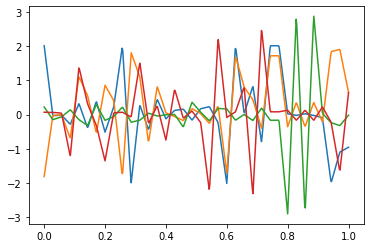

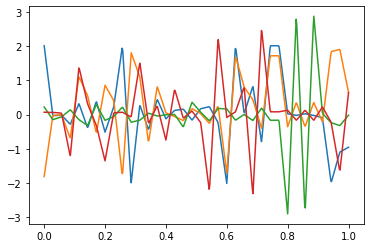

In [ ]:
fpca_discretized = FPCA(n_components=4)
fpca_discretized.fit(X_tr)
fpca_discretized.components_.plot()

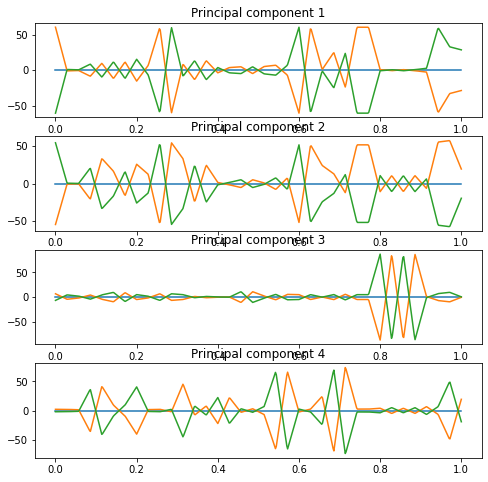

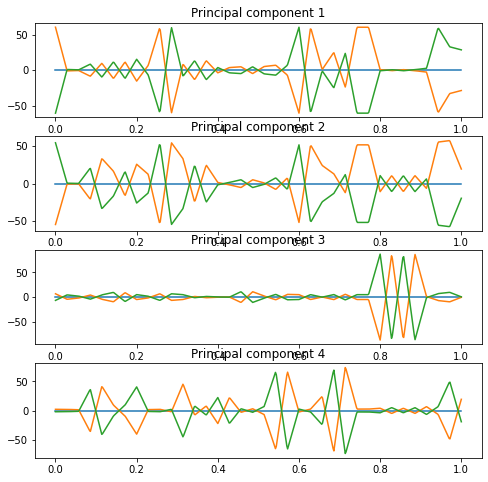

In [ ]:
plot_fpca_perturbation_graphs(X_tr.mean(),
                              fpca_discretized.components_,
                              30,
                              fig=plt.figure(figsize=(8, 2 * 4)))

In [ ]:
X = pd.DataFrame(data=[['A', 'A', 'A', 2, 5, 7, 6, 3, 6, 7],['A', 'A', 'A', 4, 4, 4, 2, 4, 4, 3],['B', 'A', 'B', 5, 2, 1, 1, 7, 1, 1],['B', 'A', 'B', 7, 2, 1, 2, 2, 2, 2],['B', 'B', 'B', 3, 5, 6, 5, 2, 6, 6],['B', 'B', 'A', 3, 5, 4, 5, 1, 7, 5]],columns=['E1 fruity', 'E1 woody', 'E1 coffee','E2 red fruit', 'E2 roasted', 'E2 vanillin', 'E2 woody','E3 fruity', 'E3 butter', 'E3 woody'],index=['Wine {}'.format(i+1) for i in range(6)])
X['Oak type'] = [1, 2, 2, 2, 1, 1]

In [ ]:
X.head()

,E1 fruity,E1 woody,E1 coffee,E2 red fruit,E2 roasted,E2 vanillin,E2 woody,E3 fruity,E3 butter,E3 woody,Oak type
Wine 1,A,A,A,2,5,7,6,3,6,7,1
Wine 2,A,A,A,4,4,4,2,4,4,3,2
Wine 3,B,A,B,5,2,1,1,7,1,1,2
Wine 4,B,A,B,7,2,1,2,2,2,2,2
Wine 5,B,B,B,3,5,6,5,2,6,6,1


In [ ]:
import prince
famd = prince.FAMD(
    n_components=2,
...     n_iter=3,
...     copy=True,
...     check_input=True,
...     engine='auto',
...     random_state=42
... )
>>> famd = famd.fit(X.drop('Oak type', axis='columns'))

In [16]:
pip install prince

In [ ]:
import prince
famd = prince.FAMD(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
famd = famd.fit(X.drop('Oak type', axis='columns'))

In [9]:
pip install light_FAMD

In [10]:
import pandas as pd
from light_famd import FAMD
X_n = pd.DataFrame(data=np.random.randint(0,100,size=(10,2)),columns=list('AB'))
X_c =pd.DataFrame(np.random.choice(list('abcde'),size=(10,4),replace=True),columns =list('CDEF'))
X=pd.concat([X_n,X_c],axis=1)
print(X)

    A   B  C  D  E  F
0  48  26  b  c  a  d
1  66  29  b  e  a  c
2  49  96  e  a  e  d
3   2  26  c  d  e  b
4  19   4  a  a  b  e
5  40  52  a  d  a  b
6  28  71  a  e  d  d
7  69  13  b  d  b  b
8  38  75  a  a  c  c
9  32  17  b  d  b  a


In [14]:
famd = FAMD(n_components=2)
famd.fit(X)


TypeError: ignored

In [17]:

import pandas as pd
import prince
import pprint

## Import data
#df = pd.read_csv('https://github.com/nchelaru/data-prep/raw/master/telco_cleaned_renamed.csv')


In [18]:

## Instantiate FAMD object
famd = prince.FAMD(
     n_components=25,
     n_iter=10,
     copy=True,
     check_input=True,
     engine='auto',       ## Can be "auto", 'sklearn', 'fbpca'
     random_state=42)

In [19]:
famd=famd.fit(X)

In [20]:
pp = pprint.PrettyPrinter()
pp.pprint(famd.explained_inertia_) 

array([2.56418541e-01, 2.18806549e-01, 1.25026703e-01, 1.03309206e-01,
       9.13227958e-02, 7.34440378e-02, 5.71551915e-02, 4.82864415e-02,
       2.62305336e-02, 1.29973077e-33])


In [22]:
## Instantiate FAMD object
famd_drive = prince.FAMD(n_components=25,n_iter=10,copy=True,check_input=True,engine='auto',random_state=42) 

In [73]:
famd_drive=famd_drive.fit(Xtr)

In [74]:
pp = pprint.PrettyPrinter()
pp.pprint(famd.explained_inertia_) 

array([2.56418541e-01, 2.18806549e-01, 1.25026703e-01, 1.03309206e-01,
       9.13227958e-02, 7.34440378e-02, 5.71551915e-02, 4.82864415e-02,
       2.62305336e-02, 1.29973077e-33])


In [75]:
pp = pprint.PrettyPrinter()
pp.pprint(famd_drive.explained_inertia_) 

array([0.00474052, 0.00429224, 0.00389629, 0.00367753, 0.00351053,
       0.00347221, 0.00329198, 0.00319103, 0.00283636, 0.00280484,
       0.00276309, 0.00267216, 0.00258841, 0.00252   , 0.00249071,
       0.00247034, 0.00246317, 0.00245389, 0.00245106, 0.00244986,
       0.0024497 , 0.0024496 , 0.00244957, 0.00244948, 0.00244937])


In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config 

In [246]:
f=((pd.to_datetime(X_tr['date.1'], yearfirst=True))-start)/ np.timedelta64(1,'D')
g=((pd.to_datetime(X_te['date.1'], yearfirst=True))-start)/ np.timedelta64(1,'D')

In [244]:
start=X_tr['date.1'][0]

In [250]:
f[955]

1.0

In [251]:
X_tr['date.1']=f
X_te['date.1']=g


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [261]:
remove=np.where(np.isnan(y_tr))

In [271]:
remove=np.array(remove)

In [272]:
remove.flatten()

array([  116,   622,  1126,  1627,  2128,  2629,  3130,  3631,  4132,
        4632,  5131,  5629,  6129,  6625,  7118,  7609,  8098,  8586,
        9072,  9558, 10043, 10528, 11009, 11489, 11966, 12443, 12918,
       13392, 13863, 14333, 14802, 15271])

In [1]:
X_trr=X_tr.drop(list(remove[0]))
X_ter=X_te.drop(list(remove[0]))

NameError: ignored

In [284]:
y_trr=y_tr.drop(list(remove[0]))
y_ter=y_te.drop(list(remove[0]))

In [276]:
X.drop([1,2])

,A,B,C,D,E,F
0,0.145319,-0.161377,b,c,a,d
3,-0.605768,-0.161377,c,d,e,b
4,-0.328192,-0.399652,a,a,b,e
5,0.014695,0.120220,a,d,a,b
6,-0.181240,0.326003,a,e,d,d
7,0.488206,-0.302176,b,d,b,b
8,-0.017961,0.369326,a,a,c,c
9,-0.115929,-0.258853,b,d,b,a


In [185]:
X_train['fail_date']=pd.to_datetime(X_train['fail_date'], yearfirst=True)
X_test['fail_date']=pd.to_datetime(X_test['fail_date'], yearfirst=True)

In [126]:
X_train['life_left']=(X_train['fail_date']-X_train['date'])/ np.timedelta64(1,'D')

In [136]:
X_test['life_left']=X_test['fail_date']-X_test['date']

In [129]:
len(X_train.columns)

39

In [172]:
X_tr=X_train.iloc[:,3:39].drop('fail_date',axis=1)

In [173]:
X_tr=X_tr.drop('life_left',axis=1)

In [163]:
X_tr['serial']=X_train['serial']

In [147]:
X_te=X_test.iloc[:,2:37]

In [240]:
X_tr.head(5)

,date.1,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_9_normalized,smart_9_raw,smart_12_raw,smart_183_normalized,smart_183_raw,smart_184_normalized,smart_184_raw,smart_187_normalized,smart_187_raw,smart_188_raw,smart_189_normalized,smart_189_raw,smart_190_normalized,smart_190_raw,smart_192_raw,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw,serial
0,2019-01-01,119.0,231195280.0,93.0,7.0,100.0,0.0,87.0,526658972.0,65.0,30873.0,7.0,100.0,0.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,76.0,24.0,0.0,81.0,38399.0,24.0,24.0,100.0,0.0,100.0,0.0,0.0,30503.0,5.403677e+10,1.219510e+11,142
1,2019-01-01,119.0,208663312.0,92.0,9.0,100.0,0.0,86.0,429695685.0,68.0,28392.0,9.0,98.0,2.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,77.0,23.0,0.0,97.0,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,0.0,28300.0,4.796113e+10,1.341161e+11,271
2,2019-01-01,119.0,233925808.0,91.0,10.0,100.0,0.0,81.0,143691431.0,72.0,25356.0,10.0,100.0,0.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,72.0,28.0,0.0,96.0,9335.0,28.0,28.0,100.0,0.0,100.0,0.0,0.0,25274.0,4.198461e+10,1.190565e+11,366
3,2019-01-01,119.0,233925808.0,91.0,10.0,100.0,0.0,81.0,143691431.0,72.0,25356.0,10.0,100.0,0.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,72.0,28.0,0.0,96.0,9335.0,28.0,28.0,100.0,0.0,100.0,0.0,0.0,25274.0,4.198461e+10,1.190565e+11,366
4,2019-01-01,117.0,162816872.0,94.0,6.0,100.0,0.0,85.0,377868052.0,68.0,28373.0,5.0,100.0,0.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,80.0,20.0,0.0,96.0,8895.0,20.0,20.0,100.0,0.0,100.0,0.0,0.0,28276.0,4.868509e+10,1.373655e+11,252


In [239]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95254 entries, 0 to 95253
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date.1                95254 non-null  object 
 1   smart_1_normalized    95254 non-null  float64
 2   smart_1_raw           95254 non-null  float64
 3   smart_3_normalized    95254 non-null  float64
 4   smart_4_raw           95254 non-null  float64
 5   smart_5_normalized    95254 non-null  float64
 6   smart_5_raw           95254 non-null  float64
 7   smart_7_normalized    95254 non-null  float64
 8   smart_7_raw           95254 non-null  float64
 9   smart_9_normalized    95254 non-null  float64
 10  smart_9_raw           95254 non-null  float64
 11  smart_12_raw          95254 non-null  float64
 12  smart_183_normalized  95254 non-null  float64
 13  smart_183_raw         95254 non-null  float64
 14  smart_184_normalized  95254 non-null  float64
 15  smart_184_raw      

In [188]:
y_tr=X_train['life_left']
y_te=X_test['life_left']


In [182]:
 y_tr/np.timedelta64(1,'D')

smart_9_normalized
65.0    316.0
68.0     26.0
72.0    178.0
68.0    160.0
66.0    192.0
        ...  
59.0    -54.0
62.0    -14.0
52.0   -165.0
60.0    -88.0
62.0   -281.0
Name: life_left, Length: 95254, dtype: float64

In [ ]:
col_select.insert(0,2)

In [252]:
set_config(print_changed_only=False) 
 
rfr = RandomForestRegressor()
print(rfr)
 
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [255]:
y_tr.isnull().any()

True

In [260]:
remove=np.where(np.isnan(y_tr))

In [285]:
rfr.fit(X_trr, y_trr)

#score = rfr.score(X_tr, y_tr)
#print("R-squared:", score) 
 


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [290]:
score = rfr.score(X_trr, (y_trr))
print("R-squared:", score) 
 

R-squared: 0.9998905498843271


In [292]:
ypred = rfr.predict(X_te)

mse = mean_squared_error(y_te, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 



MSE:  3294.4292179190456
RMSE:  1647.2146089595228


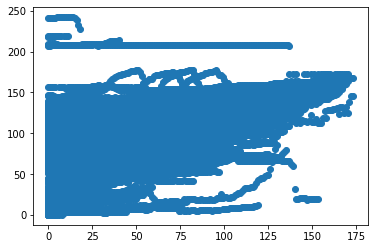

In [296]:
plt.scatter(y_te,ypred)

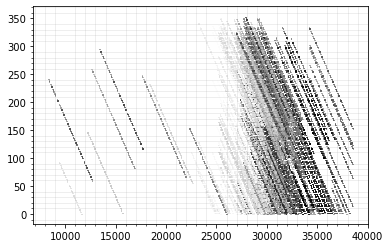

In [312]:
plt.scatter(X_trr['smart_9_raw'],y_trr,c=X_trr['serial'], marker='s',cmap='gray',s=0.05)
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.show()

In [150]:
X_train['serial_number'].nunique()

402

In [155]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
#Apply LabelEncoder on each of the categorical columns:
X_train['serial'] = le.fit_transform(X_train['serial_number'])

In [157]:
X_train['serial']

0        142
1        271
2        366
3        252
4         13
        ... 
95249    293
95250    387
95251    128
95252     63
95253    354
Name: serial, Length: 95254, dtype: int64

In [159]:
X_train = X_train.set_index(X_train['smart_9_normalized'])